In [83]:
from keras.datasets import imdb

In [84]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [85]:
print(len(XT))
print(len(Xt))

25000
25000


In [86]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [87]:
word_idx = imdb.get_word_index()

In [88]:
# print(word_idx.items())

In [89]:
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
# print(actual_review)
print(len(actual_review.split()))

218


In [90]:
# Creating a 2D Tensor
from keras.preprocessing import sequence

Xtrain = sequence.pad_sequences(XT, maxlen=500)
Xtest = sequence.pad_sequences(Xt, maxlen=500)


In [91]:
print(Xtrain.shape)
print(Xtest.shape)

(25000, 500)
(25000, 500)


In [92]:
# Creating the model
from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
from keras.callbacks import ModelCheckpoint #saves the best model, tackle overfitting
from keras.callbacks import EarlyStopping #saves time

checkpoint = ModelCheckpoint('bestModel.h5',monitor='val_loss',verbose=0,save_best_only=True,save_weights_only=False,mode='auto',period=1)
earlypoint = EarlyStopping(monitor='val_accuracy',patience=1)

hist = model.fit(Xtrain,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlypoint])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5298 - accuracy: 0.7315 - val_loss: 0.3900 - val_accuracy: 0.8316
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.3332 - accuracy: 0.8639 - val_loss: 0.4570 - val_accuracy: 0.7764


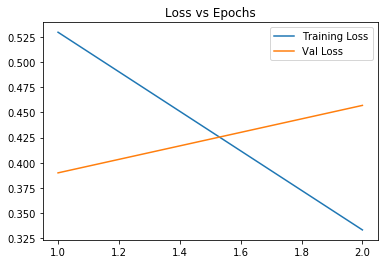

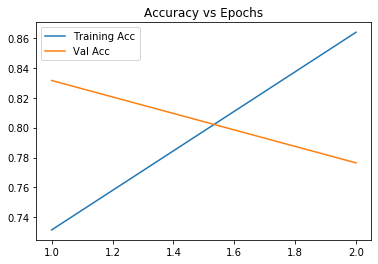

In [95]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()



plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [47]:
# model.save('mymodel.h5')

In [50]:
# model.load_weights('mymodel.h5')

In [96]:
model.load_weights('bestModel.h5')

In [97]:
model.evaluate(Xtrain,YT)


25000/25000 [==============================] - 19s 765us/step


[0.34420408425331117, 0.8570799827575684]

In [98]:
model.evaluate(Xtest,Yt)

25000/25000 [==============================] - 19s 749us/step


[0.3994661266899109, 0.8250799775123596]

In [99]:
model.predict(Xtest)

array([[0.14726505],
       [0.86489433],
       [0.58414984],
       ...,
       [0.23858172],
       [0.05602154],
       [0.7482011 ]], dtype=float32)